# Import Libraries

In [2]:
import pandas as pd
import torch
import datasets


ModuleNotFoundError: No module named 'pandas'

In [1]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("santhosh/english-malayalam-names")

# Access specific splits
train_split = dataset['train']

ModuleNotFoundError: No module named 'datasets'

In [3]:
train_split

Dataset({
    features: ['ml', 'en'],
    num_rows: 27814150
})

In [5]:
print(train_split[:10])

{'ml': ['ആർതർ റോബിൻ', 'മേരി ജാൻസി', 'മേരി ലക്സി', 'ജെറോ എം.എക്സ്', 'മില്ലററ് ജെറോം', 'ജെസീറ്റമോൾ ജെറോ', 'ആന്റണി', 'മേഴ്സി', 'ജോൺസൺ', 'വിൻസെന്റ്'], 'en': ['Arther Robin', 'Mary  Jancy', 'Mary  Luxy', 'Jero M.X', 'Millett Jerom', 'Jeseettamol Jero', 'Antony', 'Mercy', 'Johnson', 'Vincent']}


In [14]:
words = train_split['ml'][:32000]

In [26]:
malayalam_characters = [chr(i) for i in range(0x0D00, 0x0D80)]
print(malayalam_characters)
len(malayalam_characters)

['ഀ', 'ഁ', 'ം', 'ഃ', 'ഄ', 'അ', 'ആ', 'ഇ', 'ഈ', 'ഉ', 'ഊ', 'ഋ', 'ഌ', '\u0d0d', 'എ', 'ഏ', 'ഐ', '\u0d11', 'ഒ', 'ഓ', 'ഔ', 'ക', 'ഖ', 'ഗ', 'ഘ', 'ങ', 'ച', 'ഛ', 'ജ', 'ഝ', 'ഞ', 'ട', 'ഠ', 'ഡ', 'ഢ', 'ണ', 'ത', 'ഥ', 'ദ', 'ധ', 'ന', 'ഩ', 'പ', 'ഫ', 'ബ', 'ഭ', 'മ', 'യ', 'ര', 'റ', 'ല', 'ള', 'ഴ', 'വ', 'ശ', 'ഷ', 'സ', 'ഹ', 'ഺ', '഻', '഼', 'ഽ', 'ാ', 'ി', 'ീ', 'ു', 'ൂ', 'ൃ', 'ൄ', '\u0d45', 'െ', 'േ', 'ൈ', '\u0d49', 'ൊ', 'ോ', 'ൌ', '്', 'ൎ', '൏', '\u0d50', '\u0d51', '\u0d52', '\u0d53', 'ൔ', 'ൕ', 'ൖ', 'ൗ', '൘', '൙', '൚', '൛', '൜', '൝', '൞', 'ൟ', 'ൠ', 'ൡ', 'ൢ', 'ൣ', '\u0d64', '\u0d65', '൦', '൧', '൨', '൩', '൪', '൫', '൬', '൭', '൮', '൯', '൰', '൱', '൲', '൳', '൴', '൵', '൶', '൷', '൸', '൹', 'ൺ', 'ൻ', 'ർ', 'ൽ', 'ൾ', 'ൿ']


128

In [40]:
# filter words with only malayalam characters
filtered_words = [word for word in filtered_words if all(ch in malayalam_characters for ch in word)]


In [41]:
filtered_words = list(set(filtered_words))

In [42]:
words = filtered_words

In [43]:
# itos and stoi for malayalam
chars = sorted(list(set(''.join(words))))
stoi = {ch:i+1 for i,ch in enumerate(chars)}
stoi['.'] = 0
itos = {i:ch for ch,i in stoi.items()}


In [56]:
N = torch.zeros(len(stoi),len(stoi),dtype=torch.int32)
for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1,ix2 = stoi[ch1],stoi[ch2]
        N[ix1,ix2] += 1

In [59]:
word

'വിശ്വൻ'

/opt/anaconda3/envs/Neural_network_build_GPT/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 3330 (\N{MALAYALAM SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/Neural_network_build_GPT/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Matplotlib currently does not support Malayalam natively.
  func(*args, **kwargs)
/opt/anaconda3/envs/Neural_network_build_GPT/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 3333 (\N{MALAYALAM LETTER A}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/Neural_network_build_GPT/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 3334 (\N{MALAYALAM LETTER AA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/Neural_network_build_GPT/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 3335 (\N{MALAYALAM LETTER I}) missing from font(s) Dej

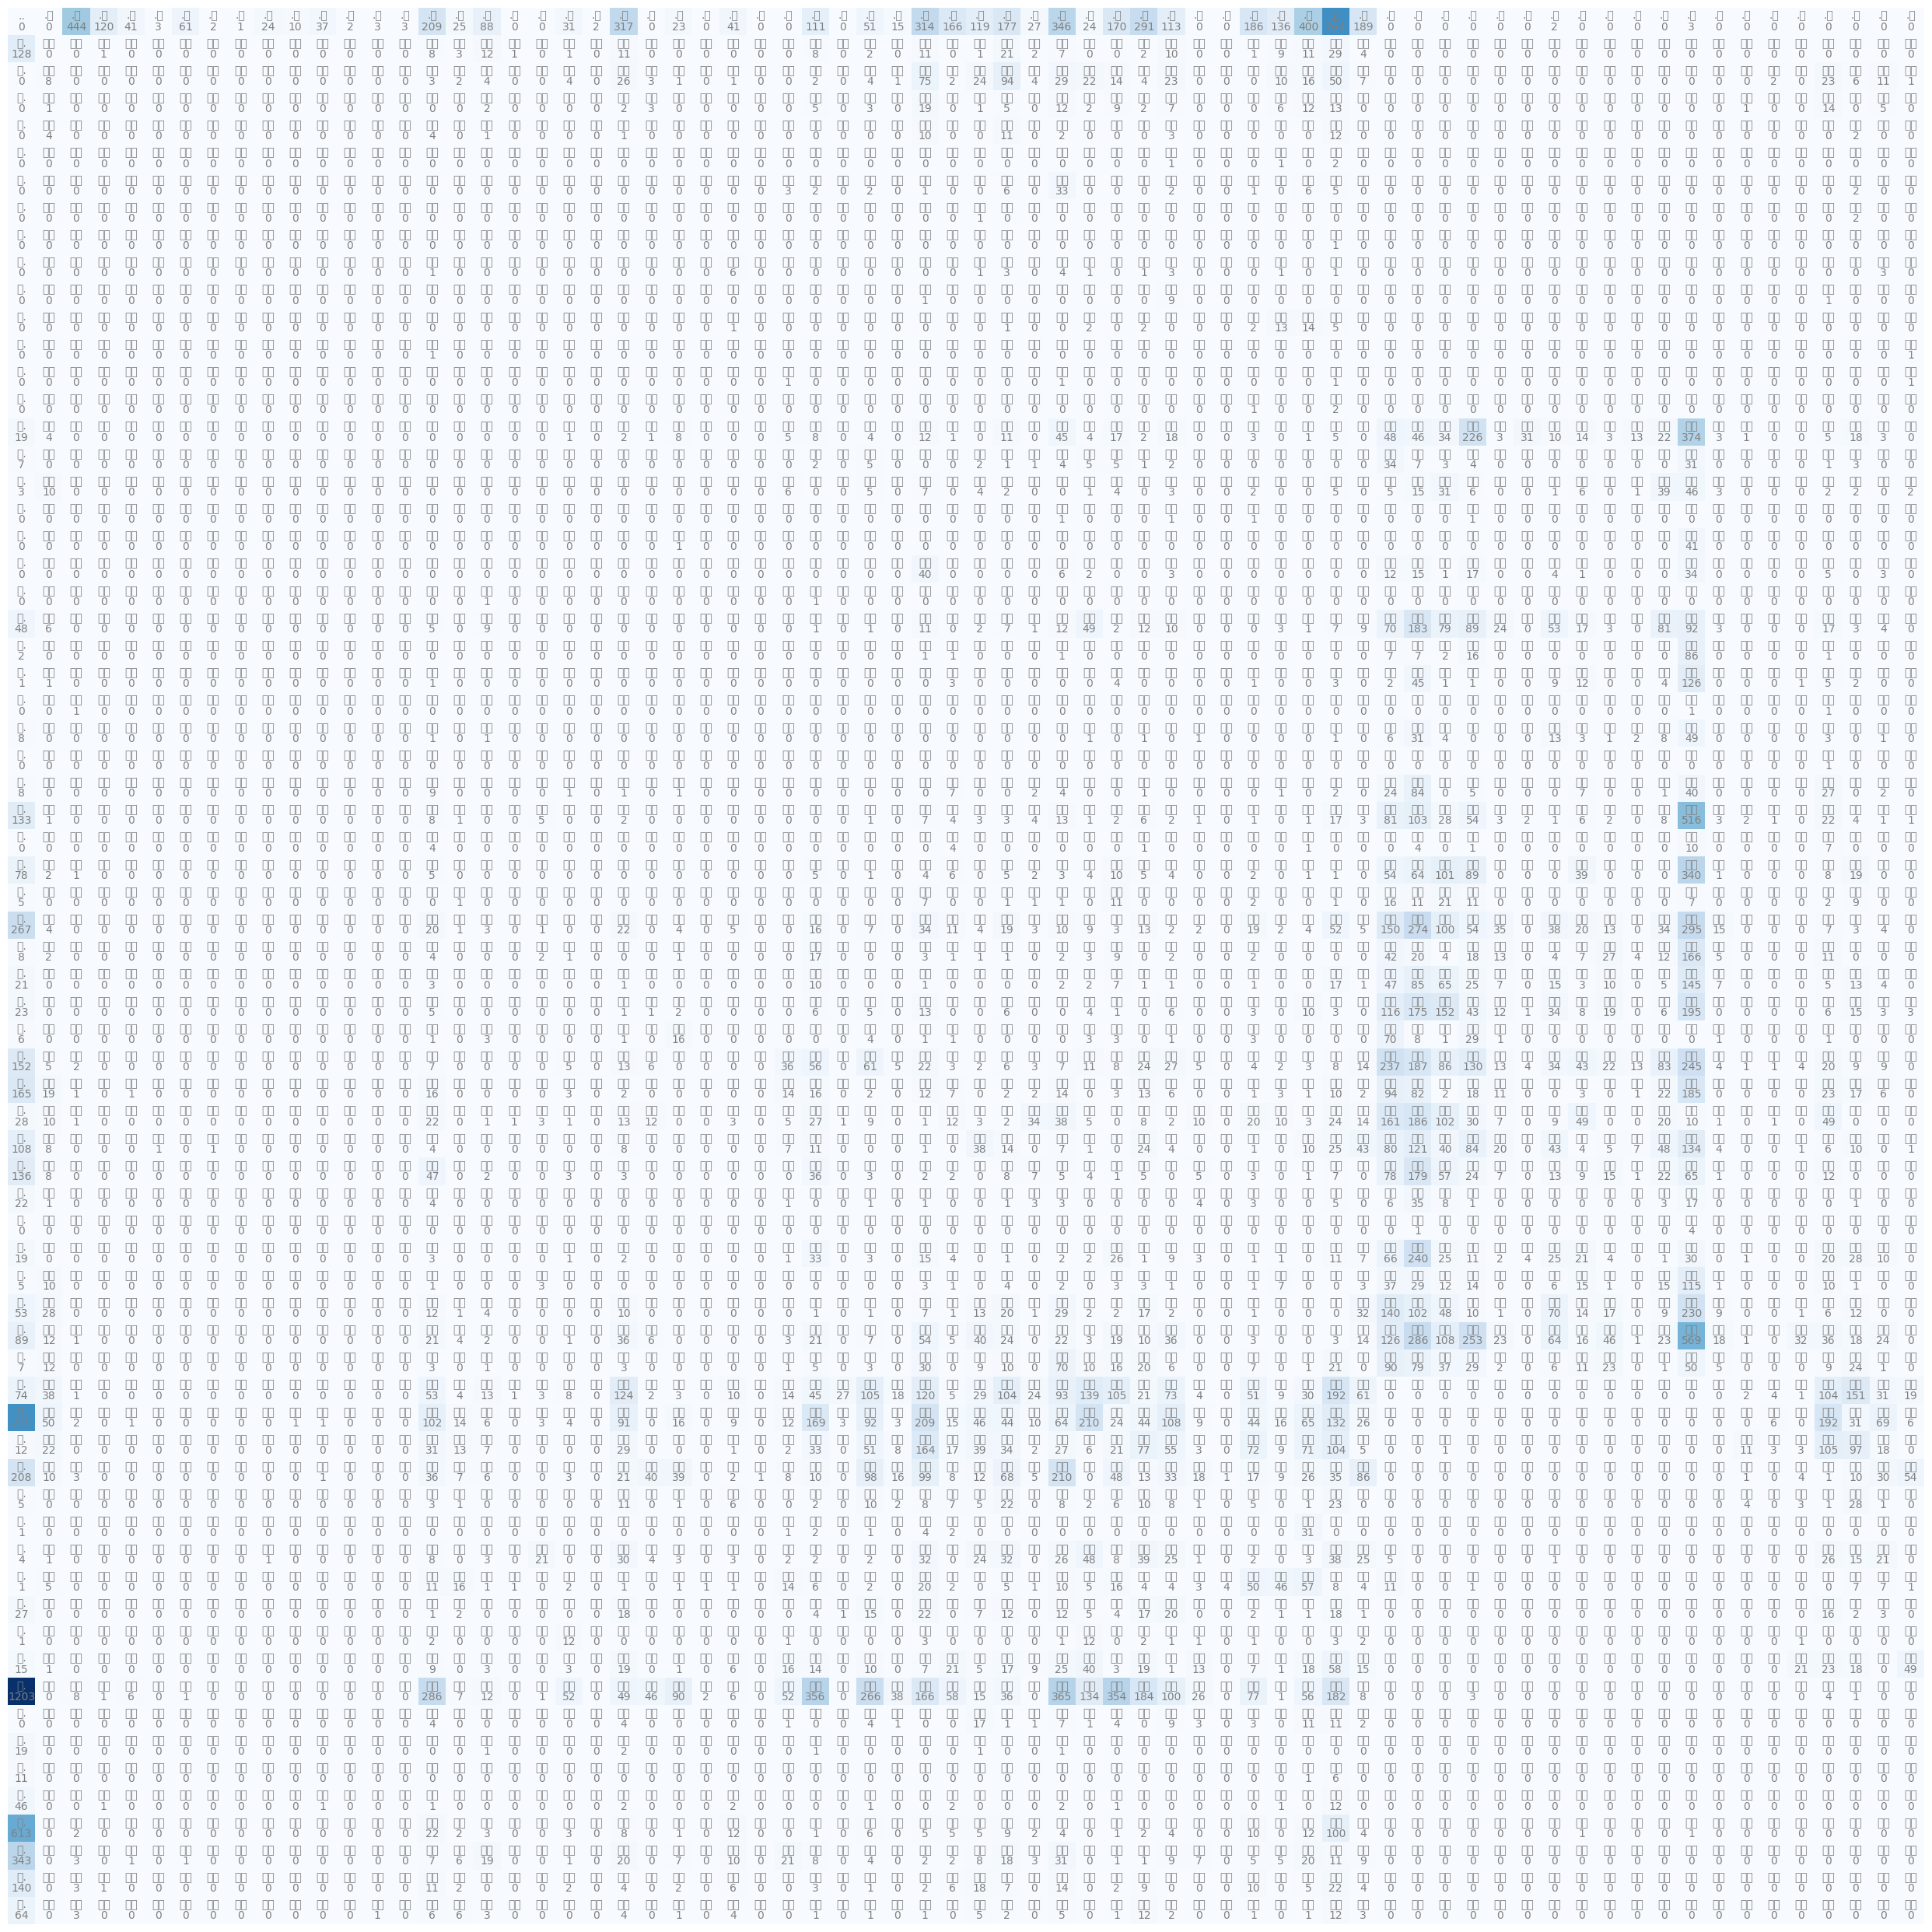

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(32,32))
plt.imshow(N, cmap='Blues')
for i in range(len(stoi)):
    for j in range(len(stoi)):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [45]:
itos

{1: 'ം',
 2: 'അ',
 3: 'ആ',
 4: 'ഇ',
 5: 'ഈ',
 6: 'ഉ',
 7: 'ഊ',
 8: 'ഋ',
 9: 'എ',
 10: 'ഏ',
 11: 'ഐ',
 12: 'ഒ',
 13: 'ഓ',
 14: 'ഔ',
 15: 'ക',
 16: 'ഖ',
 17: 'ഗ',
 18: 'ഘ',
 19: 'ങ',
 20: 'ച',
 21: 'ഛ',
 22: 'ജ',
 23: 'ഞ',
 24: 'ട',
 25: 'ഠ',
 26: 'ഡ',
 27: 'ഢ',
 28: 'ണ',
 29: 'ത',
 30: 'ഥ',
 31: 'ദ',
 32: 'ധ',
 33: 'ന',
 34: 'പ',
 35: 'ഫ',
 36: 'ബ',
 37: 'ഭ',
 38: 'മ',
 39: 'യ',
 40: 'ര',
 41: 'റ',
 42: 'ല',
 43: 'ള',
 44: 'ഴ',
 45: 'വ',
 46: 'ശ',
 47: 'ഷ',
 48: 'സ',
 49: 'ഹ',
 50: 'ാ',
 51: 'ി',
 52: 'ീ',
 53: 'ു',
 54: 'ൂ',
 55: 'ൃ',
 56: 'െ',
 57: 'േ',
 58: 'ൈ',
 59: 'ൊ',
 60: 'ോ',
 61: '്',
 62: 'ൗ',
 63: '൪',
 64: '൯',
 65: 'ൺ',
 66: 'ൻ',
 67: 'ർ',
 68: 'ൽ',
 69: 'ൾ',
 0: '.'}

In [46]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

number of examples:  39710


In [48]:
# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((len(itos), len(itos)), generator=g, requires_grad=True)

In [51]:
import torch.nn.functional as F
# gradient descent
for k in range(200):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=len(itos)).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

4.817780494689941
4.538967132568359
4.297922611236572
4.097937107086182
3.947826623916626
3.8331379890441895
3.737821578979492
3.6575450897216797
3.5893359184265137
3.5306057929992676
3.479309320449829
3.433966875076294
3.3935365676879883
3.3572633266448975
3.3245744705200195
3.2950103282928467
3.2681801319122314
3.2437453269958496
3.2214109897613525
3.2009198665618896
3.182051181793213
3.1646173000335693
3.148456335067749
3.133432149887085
3.1194264888763428
3.106337070465088
3.094075918197632
3.0825631618499756
3.0717296600341797
3.0615131855010986
3.0518598556518555
3.042719841003418
3.034050703048706
3.0258138179779053
3.017975091934204
3.0105044841766357
3.0033743381500244
2.99656081199646
2.990041494369507
2.9837963581085205
2.9778082370758057
2.972059965133667
2.9665369987487793
2.9612252712249756
2.9561119079589844
2.951186418533325
2.9464364051818848
2.941852569580078
2.9374263286590576
2.93314790725708
2.9290103912353516
2.9250054359436035
2.9211268424987793
2.917368412017822

In [61]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(1729)

for i in range(20):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=len(itos)).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

സ്.
ഷ്കുമജ്വ്മഖ്ലദ.
രി.
സുസാർ.
ബഒപ്മായായ.
മാവിയില്.
ഏദീവാ.
സനി.
റ്ത്.
ഷി.
ജോഷ്.
അളിന.
പൺസ്റശപ്ദ്.
വ.
ഷ.
നീസ്.
ജി.
ധികബിൻ.
ജർ.
അനെൻകു.
